# Histogramas en Python

## Histogramas en Python puro

In [1]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [3]:
def count_elements(seq) -> dict:
    """
    Función que cuenta las frecuencias
    de aparición de cada elemento de la
    secuencia, creando un diccionario como
    si fuese una tabla de frecuencias
    """
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

In [4]:
fAbs = count_elements(x)

In [5]:
fAbs

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [6]:
from collections import Counter

In [7]:
fAbs2 = Counter(x)

In [8]:
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [9]:
fAbs.items() == fAbs2.items()

True

In [10]:
def ascii_histogram(seq) -> None:
    """
    Un histograma de frecuencias absolutas
    colocado en horizontal y con caracteres ASCII
    """
    fAbs = count_elements(seq)
    for k in sorted(fAbs):
        print('{0:5d} {1}'.format(k, '+'*fAbs[k]))

In [11]:
ascii_histogram(x)

    0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [24]:
import random
random.seed(2019)

In [25]:
vals = [1,2,3,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)

In [26]:
data = []
for k, v in zip(vals, freqs):
    data.extend([k]*v)

In [27]:
ascii_histogram(data)

    1 +++++++++
    2 ++++++++++++
    3 ++++++++++++++++++++
    5 ++++++++++
    7 ++++++++++++
    8 ++++++++++++
    9 +++++++++++++++
   10 ++++++++++++++


## Matplotlib and Pandas

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
x = np.random.laplace(10, 3, 1000)

(0.0, 140.0)

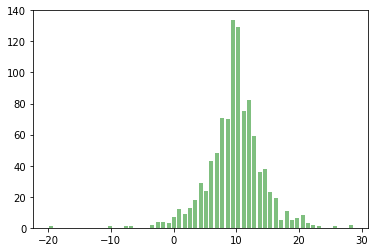

In [3]:
n, bins, patch = plt.hist(x = x, bins='auto', color='green', alpha = 0.5, rwidth=0.75)
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10)*10 if maxfreq%10 else maxfreq +10)

In [28]:
size, scale = 1000, 10
da = pd.Series(np.random.gamma(scale, size= size))

<AxesSubplot:ylabel='Frequency'>

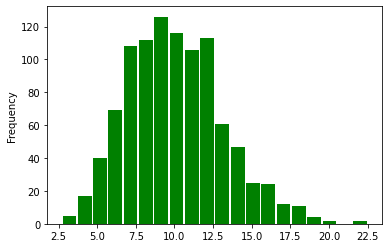

In [12]:
da.plot.hist(bins=20, color= 'green', rwidth=0.9)

## Funciones de Densidad y probabilidad

In [2]:
mu = 10, 20
sigma = 5, 2
dis = pd.DataFrame(np.random.normal(loc= mu, scale=sigma, size= (1000, 2)), columns = ['x1','x2'])

In [10]:
dis.agg(['min', 'max', 'std', 'mean']).round(decimals=2)

,x1,x2
min,-5.22,12.57
max,26.38,26.09
std,4.98,2.01
mean,10.15,20.06


<AxesSubplot:ylabel='Frequency'>

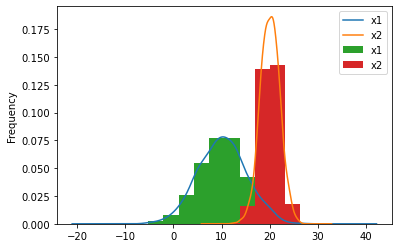

In [12]:
fig, ax = plt.subplots()
dis.plot.kde(ax = ax)
dis.plot.hist(density=True, ax = ax)


## Histogramas con Seaborn

<AxesSubplot:ylabel='Count'>

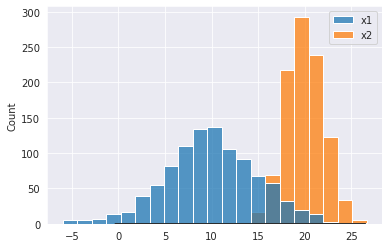

In [33]:
import seaborn as sns
from scipy import stats
sns.set_style('darkgrid') ## revisar estilos de set_style
sns.histplot(dis)

<AxesSubplot:>

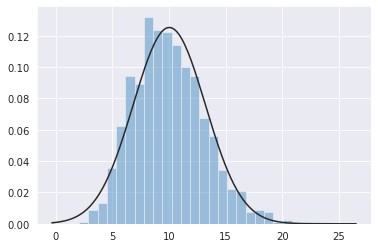

In [34]:
sns.distplot(da, fit=stats.norm, kde= False)

## Otras formas

In [12]:
data2 = np.random.choice(np.arange(10), size= 1000, p=np.linspace(1, 11, 10)/60)
s = pd.Series(data2)

In [13]:
s.value_counts()

9    179
8    176
7    154
6    144
5     94
4     91
2     54
3     49
1     42
0     17
dtype: int64

In [19]:
import random
ages = pd.Series(random.sample(range(19, 45), 10))
bins = (19, 25, 30, 35, 46)
gr = pd.cut(ages, bins=bins)
gr

0    (30, 35]
1    (19, 25]
2    (25, 30]
3    (25, 30]
4    (19, 25]
5    (25, 30]
6    (30, 35]
7    (30, 35]
8    (35, 46]
9    (25, 30]
dtype: category
Categories (4, interval[int64]): [(19, 25] < (25, 30] < (30, 35] < (35, 46]]

In [20]:
gr.value_counts()

(25, 30]    4
(30, 35]    3
(19, 25]    2
(35, 46]    1
dtype: int64

In [22]:
pd.concat((ages, gr), axis=1).rename(columns={0:'age', 1:'group'})

,age,group
0,34,"(30, 35]"
1,22,"(19, 25]"
2,30,"(25, 30]"
3,29,"(25, 30]"
4,20,"(19, 25]"
5,28,"(25, 30]"
6,31,"(30, 35]"
7,35,"(30, 35]"
8,36,"(35, 46]"
9,26,"(25, 30]"
